In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import missingno as msno

In [2]:
train=pd.read_csv(r"C:\Users\Chinnu\Downloads\Train_SU63ISt.csv")# reading the train dataset
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
test=pd.read_csv(r"C:\Users\Chinnu\Downloads\Test_0qrQsBZ.csv")# reading the train dataset
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [4]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [5]:
train['Datetime'] = pd.to_datetime(train['Datetime'])
train.dtypes


ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [6]:
train['year']=train['Datetime'].apply(lambda x:x.year)
train['month']=train['Datetime'].apply(lambda x:x.month)
train['day']=train['Datetime'].apply(lambda x:x.day)
train['dayofweek']=train['Datetime'].apply(lambda x:x.dayofweek)
train.head()

,ID,Datetime,Count,year,month,day,dayofweek
0,0,2012-08-25 00:00:00,8,2012,8,25,5
1,1,2012-08-25 01:00:00,2,2012,8,25,5
2,2,2012-08-25 02:00:00,6,2012,8,25,5
3,3,2012-08-25 03:00:00,2,2012,8,25,5
4,4,2012-08-25 04:00:00,2,2012,8,25,5


In [7]:
test['Datetime'] = pd.to_datetime(test['Datetime'])
test.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

In [8]:
test['year']=test['Datetime'].apply(lambda x:x.year)
test['month']=test['Datetime'].apply(lambda x:x.month)
test['day']=test['Datetime'].apply(lambda x:x.day)
test['dayofweek']=test['Datetime'].apply(lambda x:x.dayofweek)
test.head()

,ID,Datetime,year,month,day,dayofweek
0,18288,2014-09-26 00:00:00,2014,9,26,4
1,18289,2014-09-26 01:00:00,2014,9,26,4
2,18290,2014-09-26 02:00:00,2014,9,26,4
3,18291,2014-09-26 03:00:00,2014,9,26,4
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [9]:
train.shape

(18288, 7)

In [10]:
train.isna().sum()

ID           0
Datetime     0
Count        0
year         0
month        0
day          0
dayofweek    0
dtype: int64

In [11]:
test.isna().sum()

ID           0
Datetime     0
year         0
month        0
day          0
dayofweek    0
dtype: int64

In [12]:
test.shape

(5112, 6)

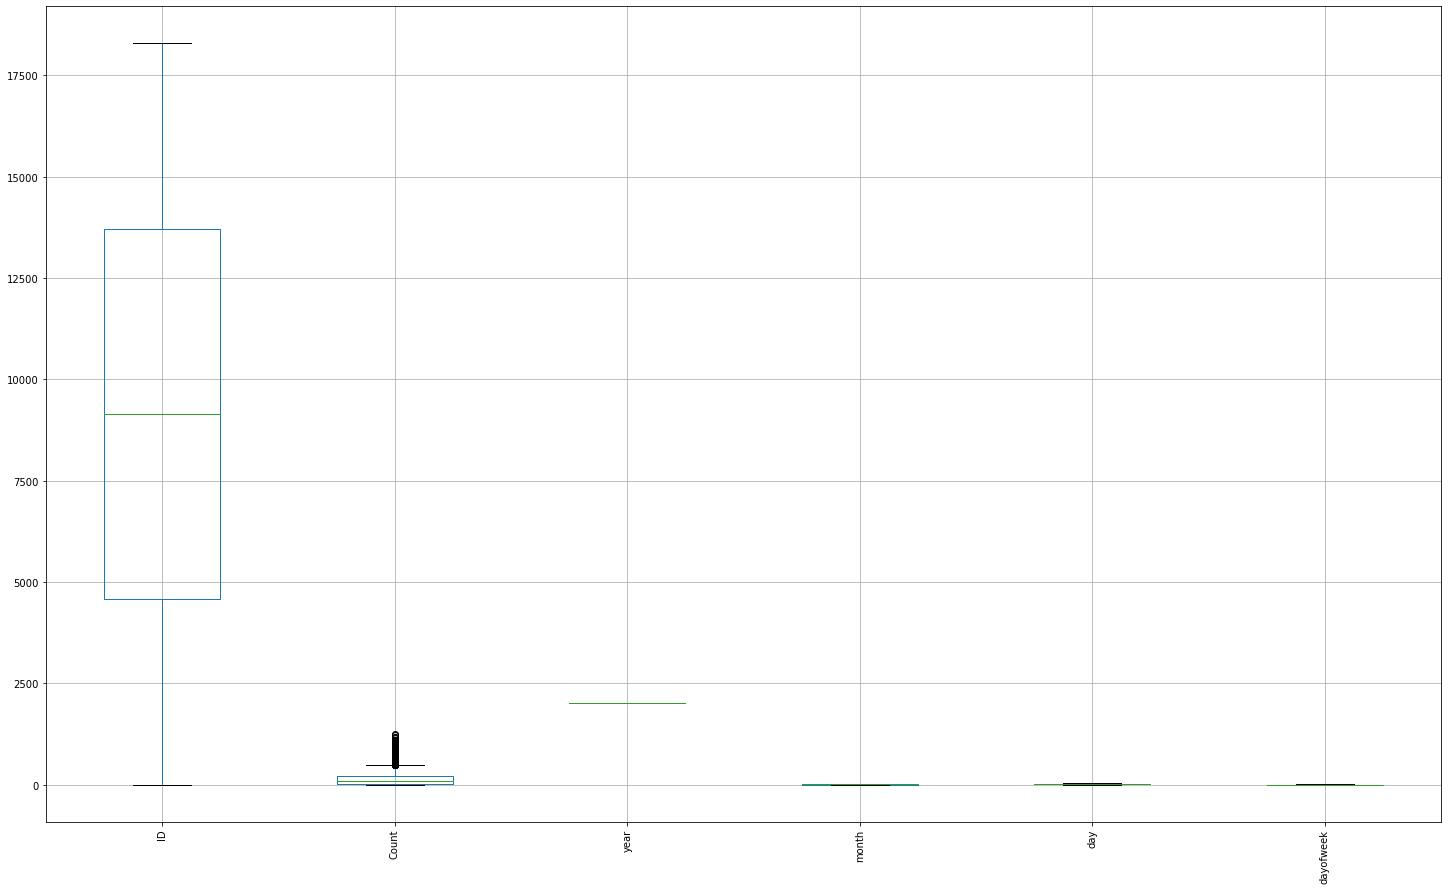

In [13]:
graph=train.select_dtypes(include=['float64','int64'])# check outliers
graph.boxplot(figsize=(25,15))
plt.xticks(rotation=90)
plt.show()

In [14]:
train['Count']=np.log(train['Count'])

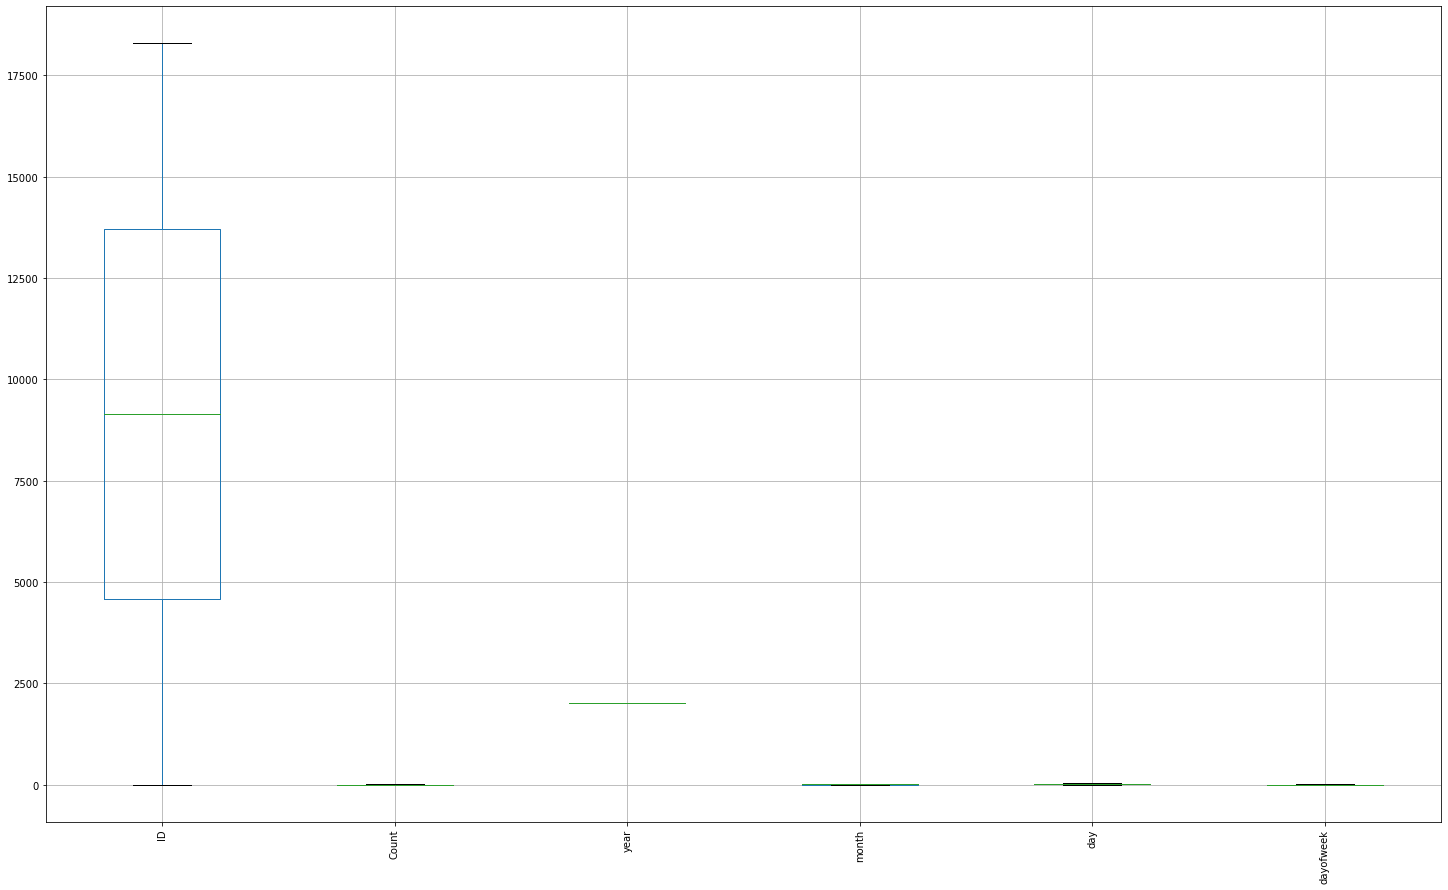

In [15]:
graph=train.select_dtypes(include=['float64','int64'])# check outliers
graph.boxplot(figsize=(25,15))
plt.xticks(rotation=90)
plt.show()

In [16]:
d_list = ['Datetime']
train = train.drop(d_list,axis = 1 )
train.head()

,ID,Count,year,month,day,dayofweek
0,0,2.079442,2012,8,25,5
1,1,0.693147,2012,8,25,5
2,2,1.791759,2012,8,25,5
3,3,0.693147,2012,8,25,5
4,4,0.693147,2012,8,25,5


In [17]:
d_list = ['Datetime']
test = test.drop(d_list,axis = 1 )
test.head()

,ID,year,month,day,dayofweek
0,18288,2014,9,26,4
1,18289,2014,9,26,4
2,18290,2014,9,26,4
3,18291,2014,9,26,4
4,18292,2014,9,26,4


In [18]:
X=train.drop('Count', axis = 1)
y = train['Count']
X_test1 = test

In [19]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [20]:
pip install flaml


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from flaml import AutoML

automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression',  # task type
    "log_file_name": 'houses_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 08-10 14:00:37] {2444} INFO - task = regression
[flaml.automl: 08-10 14:00:37] {2446} INFO - Data split method: uniform
[flaml.automl: 08-10 14:00:37] {2449} INFO - Evaluation method: cv
[flaml.automl: 08-10 14:00:37] {2568} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-10 14:00:37] {2708} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 08-10 14:00:37] {3010} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-10 14:00:38] {3143} INFO - Estimated sufficient time budget=674s. Estimated necessary time budget=1s.
[flaml.automl: 08-10 14:00:38] {3190} INFO -  at 0.1s,	estimator lgbm's best error=0.8524,	best estimator lgbm's best error=0.8524
[flaml.automl: 08-10 14:00:38] {3010} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-10 14:00:38] {3190} INFO -  at 0.2s,	estimator lgbm's best error=0.8524,	best estimator lgbm's best error=0.8524
[flaml.automl: 08-10 14:00:38] {3010} INFO - iteration 2, current learner lgbm
[flaml.automl: 

In [22]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)

Best hyperparmeter config: {'n_estimators': 16, 'num_leaves': 12558, 'min_child_samples': 2, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.9184265219428027, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.007137552319733636}
Best r2 on validation data: 0.8975
Training duration of best run: 0.3988 s
LGBMRegressor(colsample_bytree=0.9184265219428027, learning_rate=1.0,
              max_bin=1023, min_child_samples=2, n_estimators=2,
              num_leaves=12558, reg_alpha=0.0009765625,
              reg_lambda=0.007137552319733636, verbose=-1)


In [23]:
from flaml.ml import sklearn_metric_loss_score
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)


Best hyperparmeter config: {'n_estimators': 16, 'num_leaves': 12558, 'min_child_samples': 2, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.9184265219428027, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.007137552319733636}
Best r2 on validation data: 0.8975
Training duration of best run: 0.3988 s
LGBMRegressor(colsample_bytree=0.9184265219428027, learning_rate=1.0,
              max_bin=1023, min_child_samples=2, n_estimators=2,
              num_leaves=12558, reg_alpha=0.0009765625,
              reg_lambda=0.007137552319733636, verbose=-1)


In [24]:
automl.model.estimator

LGBMRegressor(colsample_bytree=0.9184265219428027, learning_rate=1.0,
              max_bin=1023, min_child_samples=2, n_estimators=2,
              num_leaves=12558, reg_alpha=0.0009765625,
              reg_lambda=0.007137552319733636, verbose=-1)

<BarContainer object of 5 artists>

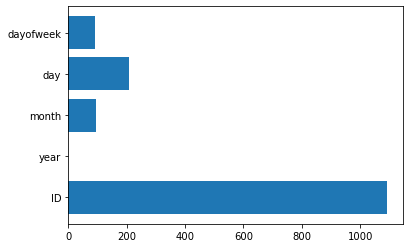

In [25]:
import matplotlib.pyplot as plt
plt.barh(automl.feature_names_in_, automl.feature_importances_)

In [30]:

y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)


from flaml.ml import sklearn_metric_loss_score
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('rmse', '=' ,sklearn_metric_loss_score('rmse',y_pred,y_test))




Predicted labels [4.44351733 5.2962474  5.26184629 ... 4.188166   4.58983842 4.61199516]
r2 = 0.9013099834528042
mse = 0.2078094761103252
rmse = 0.45586124655461246


In [27]:
# Predicting the test data
pred =automl.predict(X_test1)

In [32]:
test_df = pd.read_csv(r"C:\Users\Chinnu\Downloads\Test_0qrQsBZ.csv")
submission = pd.read_csv(r"C:\Users\Chinnu\Downloads\sample_submission_LSeus50.csv")
submission.head()

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0


In [33]:
submission=pd.DataFrame({'ID':test_df['ID'],'Count':pred})

In [34]:
submission.to_csv(r"C:\Users\Chinnu\Downloads\sample_submission_LSeus50.csv", index=False)

In [35]:
submission.head()

,ID,Count
0,18288,6.339352
1,18289,6.339352
2,18290,6.339352
3,18291,6.339352
4,18292,6.339352
